In [2]:
from sompz.functions_WL_Y3 import build_balrog_df, build_spec_df
import numpy as np
import matplotlib.pyplot as plt

In [5]:
deep_som_size = 64*64 
# wide_som_size = 32*32

# n_bins = 4
# bin_edges =  [0.0, 0.358, 0.631, 0.872, 2.0] 

data_dir = './output_y3data/'
run_name = 'SOMF'

deep_balrog_file = '/global/cscratch1/sd/acampos/sompz_data/v0.50_andresa/deep_balrog.pkl'
deep_cells_assignment_deep_balrog_file = '/global/cscratch1/sd/acampos/sompz/test/full_run_on_data/SOM/cats_Y3/cells_deep_balrog_newSOM_y3.txt'
wide_cells_assignment_deep_balrog_file = '/global/cscratch1/sd/acampos/sompz/test/full_run_on_data/SOM/cats_Y3/cells_wide_balrog_SOMF_230117.txt'

# smooth_response_filename = '/global/u1/d/dgruen/work/sompz/test/full_run_on_data/y3_shape_response_grid_03_31_20.txt'

cosmos_file = '/global/cscratch1/sd/jmyles/COSMOS2015/sompz_cosmos.h5'

# wide_field_file = '/global/cscratch1/sd/acampos/sompz_data/Y3_mastercat_03_31_20.h5'
# wide_cells_assignment_file = '/global/cscratch1/sd/acampos/sompz/test/full_run_on_data/SOM/cats_Y3/cells_wide_assignment_all.csv'

In [6]:
deep_balrog_data = build_balrog_df(deep_balrog_file, 
                    deep_cells_assignment_deep_balrog_file, 
                    wide_cells_assignment_deep_balrog_file)

Length of balrog_data: 2417437


In [7]:
spec_data = build_spec_df(cosmos_file, deep_balrog_data)

n duplicated Laigle 39399
all cosmos deep:  521851
matched cosmos deep:  451766
unmatched cosmos deep:  70085


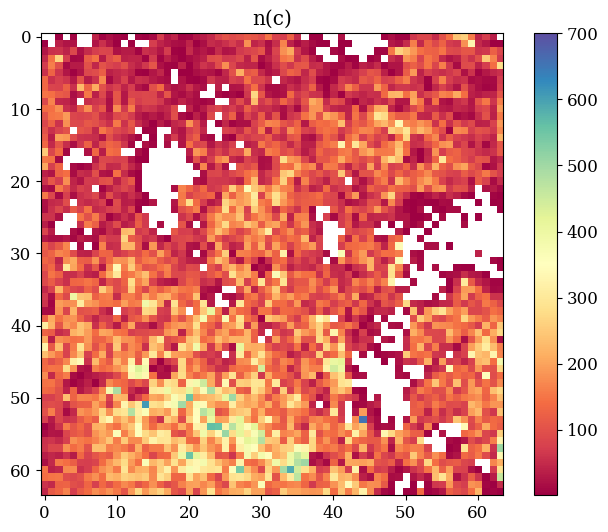

In [26]:
n_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    n_t_cosmos[ti] = maskt.sum()
    if maskt.sum()<1: n_t_cosmos[ti] = np.nan
    else: n_t_cosmos[ti] = maskt.sum()
    
plt.figure(figsize=(8,6))
a = plt.imshow((n_t_cosmos.reshape((64, 64))), cmap='Spectral', vmax=700, interpolation='none')
plt.colorbar()
plt.title('n(c)')
plt.savefig(data_dir + 'n_t_cosmos_Y3.png')

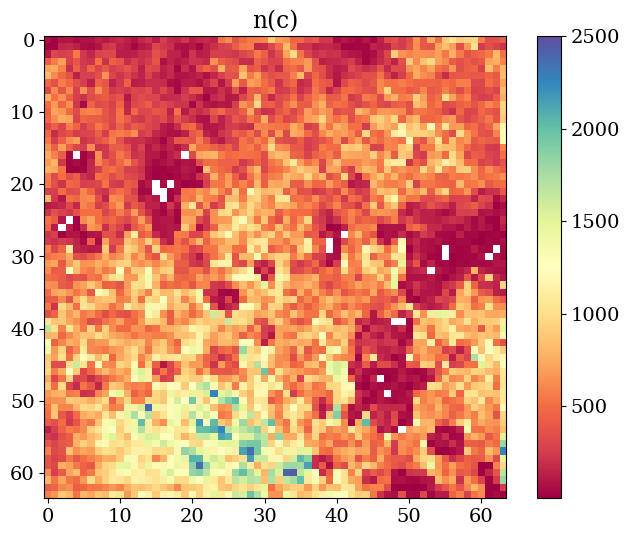

In [14]:
n_t_data = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = deep_balrog_data['cell_deep'].values == ti
    n_t_data[ti] = maskt.sum()

for ti in range(deep_som_size):
    if n_t_data[ti] == 0:
           n_t_data[ti] = np.nan
    
    
plt.figure(figsize=(8,6))
a = plt.imshow((n_t_data.reshape((64, 64))), cmap='Spectral', vmax=2500, interpolation='none')
plt.colorbar()
plt.title('n(c)')
plt.savefig(data_dir + 'n_t_deep_data_Y3.png')

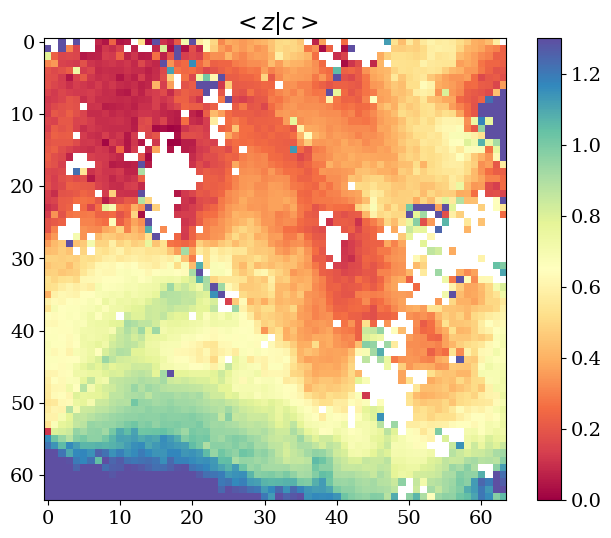

In [16]:
z_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: z_t_cosmos[ti] = np.mean(spec_data['Z'].values[maskt])
        
plt.figure(figsize=(8,6))
b = plt.imshow((z_t_cosmos.reshape((64, 64))), cmap='Spectral', interpolation='none', vmin=0, vmax=1.3)
plt.colorbar()
plt.title(r'$<z|c>$')
plt.savefig(data_dir + 'z_deep_SOMF.png')

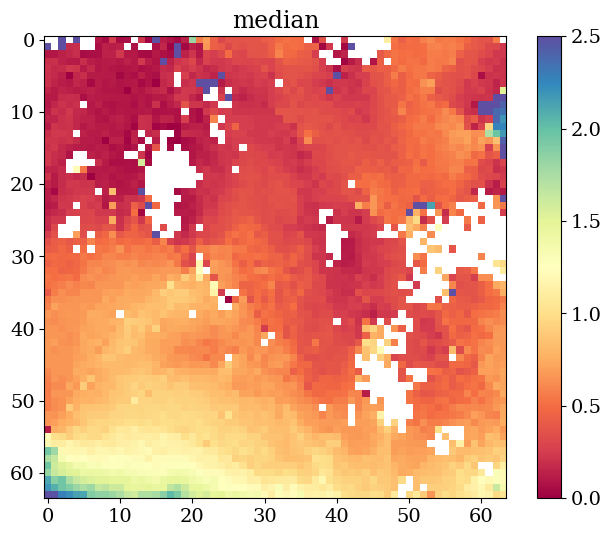

In [17]:
z_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: z_t_cosmos[ti] = np.median(spec_data['Z'].values[maskt])
        
plt.figure(figsize=(8,6))
plt.imshow((z_t_cosmos.reshape((64, 64))), cmap='Spectral', vmin=0, vmax=2.5, interpolation='none')
plt.colorbar()
plt.title('median')
plt.savefig(data_dir + 'z_t_cosmos_median_Y3.png')

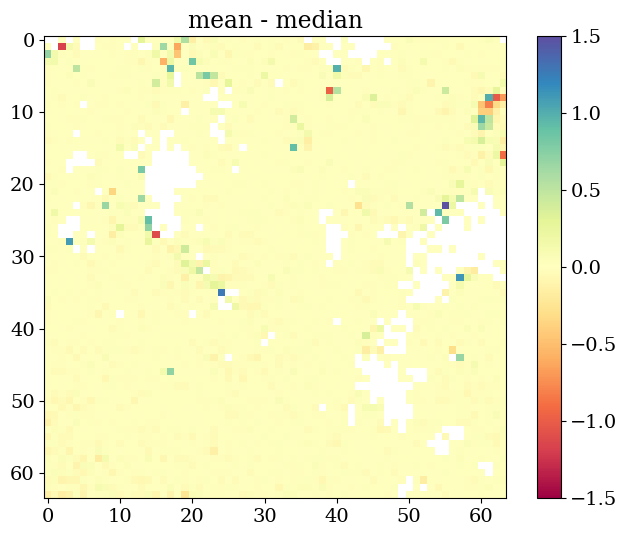

In [18]:
z_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: z_t_cosmos[ti] = (np.mean(spec_data['Z'].values[maskt]) - np.median(spec_data['Z'].values[maskt]))
        
plt.figure(figsize=(8,6))
plt.imshow((z_t_cosmos.reshape((64, 64))), cmap='Spectral', vmin=-1.5, vmax=1.5, interpolation='none')
plt.colorbar()
plt.title('mean - median')
plt.savefig(data_dir + 'z_t_cosmos_mean-median_Y3.png')

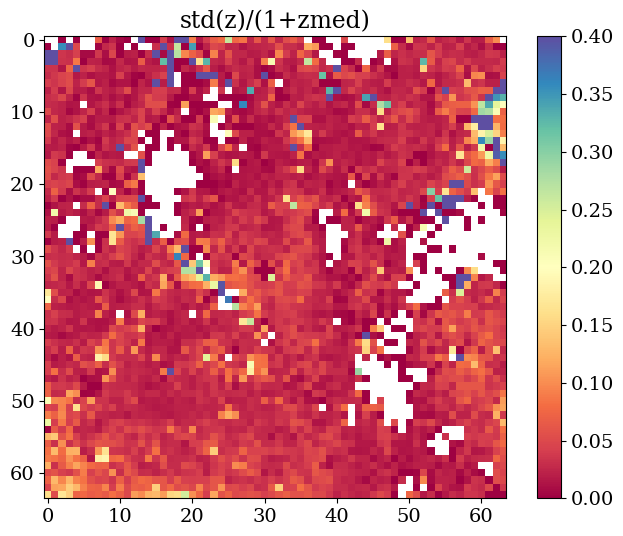

In [20]:
z_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: z_t_cosmos[ti] = (np.std(spec_data['Z'].values[maskt])/(1+np.median(spec_data['Z'].values[maskt])))
        
plt.figure(figsize=(8,6))
c = plt.imshow((z_t_cosmos.reshape((64, 64))), cmap='Spectral', vmin=0, vmax=0.4, interpolation='none')
plt.colorbar()
plt.title('std(z)/(1+zmed)')
plt.savefig(data_dir + 'z_t_cosmos_std_Y3.png')

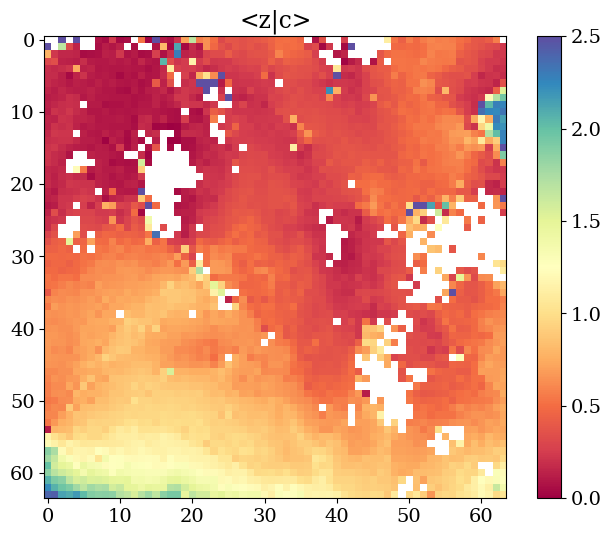

In [21]:
z_t_cosmos = np.zeros(deep_som_size)
for ti in range(deep_som_size):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: z_t_cosmos[ti] = np.mean(spec_data['Z'].values[maskt])
        
plt.figure(figsize=(8,6))
plt.imshow((z_t_cosmos.reshape((64, 64))), cmap='Spectral', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()
plt.title('<z|c>')
#
plt.savefig(data_dir + 'z_t_cosmos_2_Y3.png')

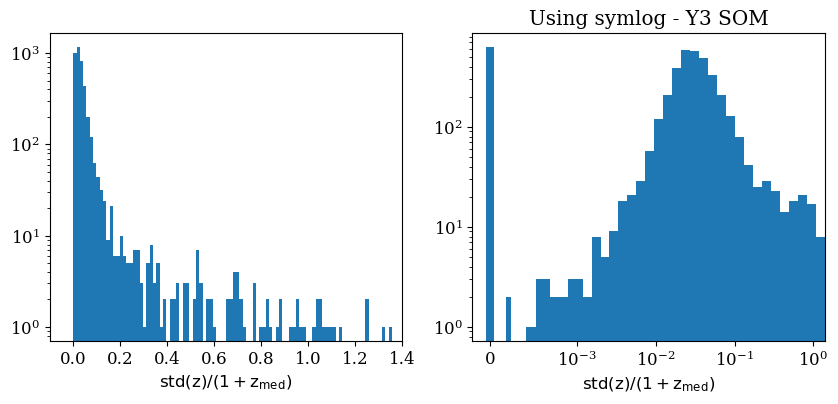

In [25]:
sig_z_cosmos = np.zeros(64**2)
for ti in range(64**2):
    maskt = spec_data['cell_deep'].values == ti
    if maskt.sum()<1: z_t_cosmos[ti] = np.nan
    else: sig_z_cosmos[ti] = (np.std(spec_data['Z'].values[maskt])/(1+np.median(spec_data['Z'].values[maskt])))

fig, ax = plt.subplots(1,2, figsize=(10,4))

plt.rc('font', size=12)
plt.rc('font', family="serif")
plt.rc('text', usetex=False)

ax[0].hist(sig_z_cosmos, bins = np.linspace(0.0, 1.4, 100))
ax[0].set_yscale('log')
ax[0].set_xlim(-0.1, 1.4)
ax[0].set_xticks(np.arange(0.0,1.5, 0.2))


linthresh = 0.001
_bins = np.concatenate((
    np.array([-linthresh, linthresh])/20.,
    np.logspace(np.log10(linthresh/20.), np.log10(1.4), 40)[1:])
)
ax[1].hist(sig_z_cosmos, bins = _bins)
ax[1].set_yscale('log')
ax[1].set_xscale('symlog', linthresh=linthresh)
ax[1].set_xlim(-linthresh/5., 1.4)


ax[1].set_title("Using symlog - Y3 SOM")
ax[0].set_xlabel(r"$\rm{std}(z)/(1+z_{\rm med})$")
ax[1].set_xlabel(r"$\rm{std}(z)/(1+z_{\rm med})$")

fig.savefig(data_dir + 'hist_z_cosmos_std_med_100bins_Y3_symlog.png', bbox_inches='tight', dpi=300)
plt.show()